In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load dataset
df = pd.read_csv(r"C:\Users\kulla\Desktop\Mini Project\Datasets\cardio_train\cardio_train.csv",sep=';') 
df = df.dropna()



In [3]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [5]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [7]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [9]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

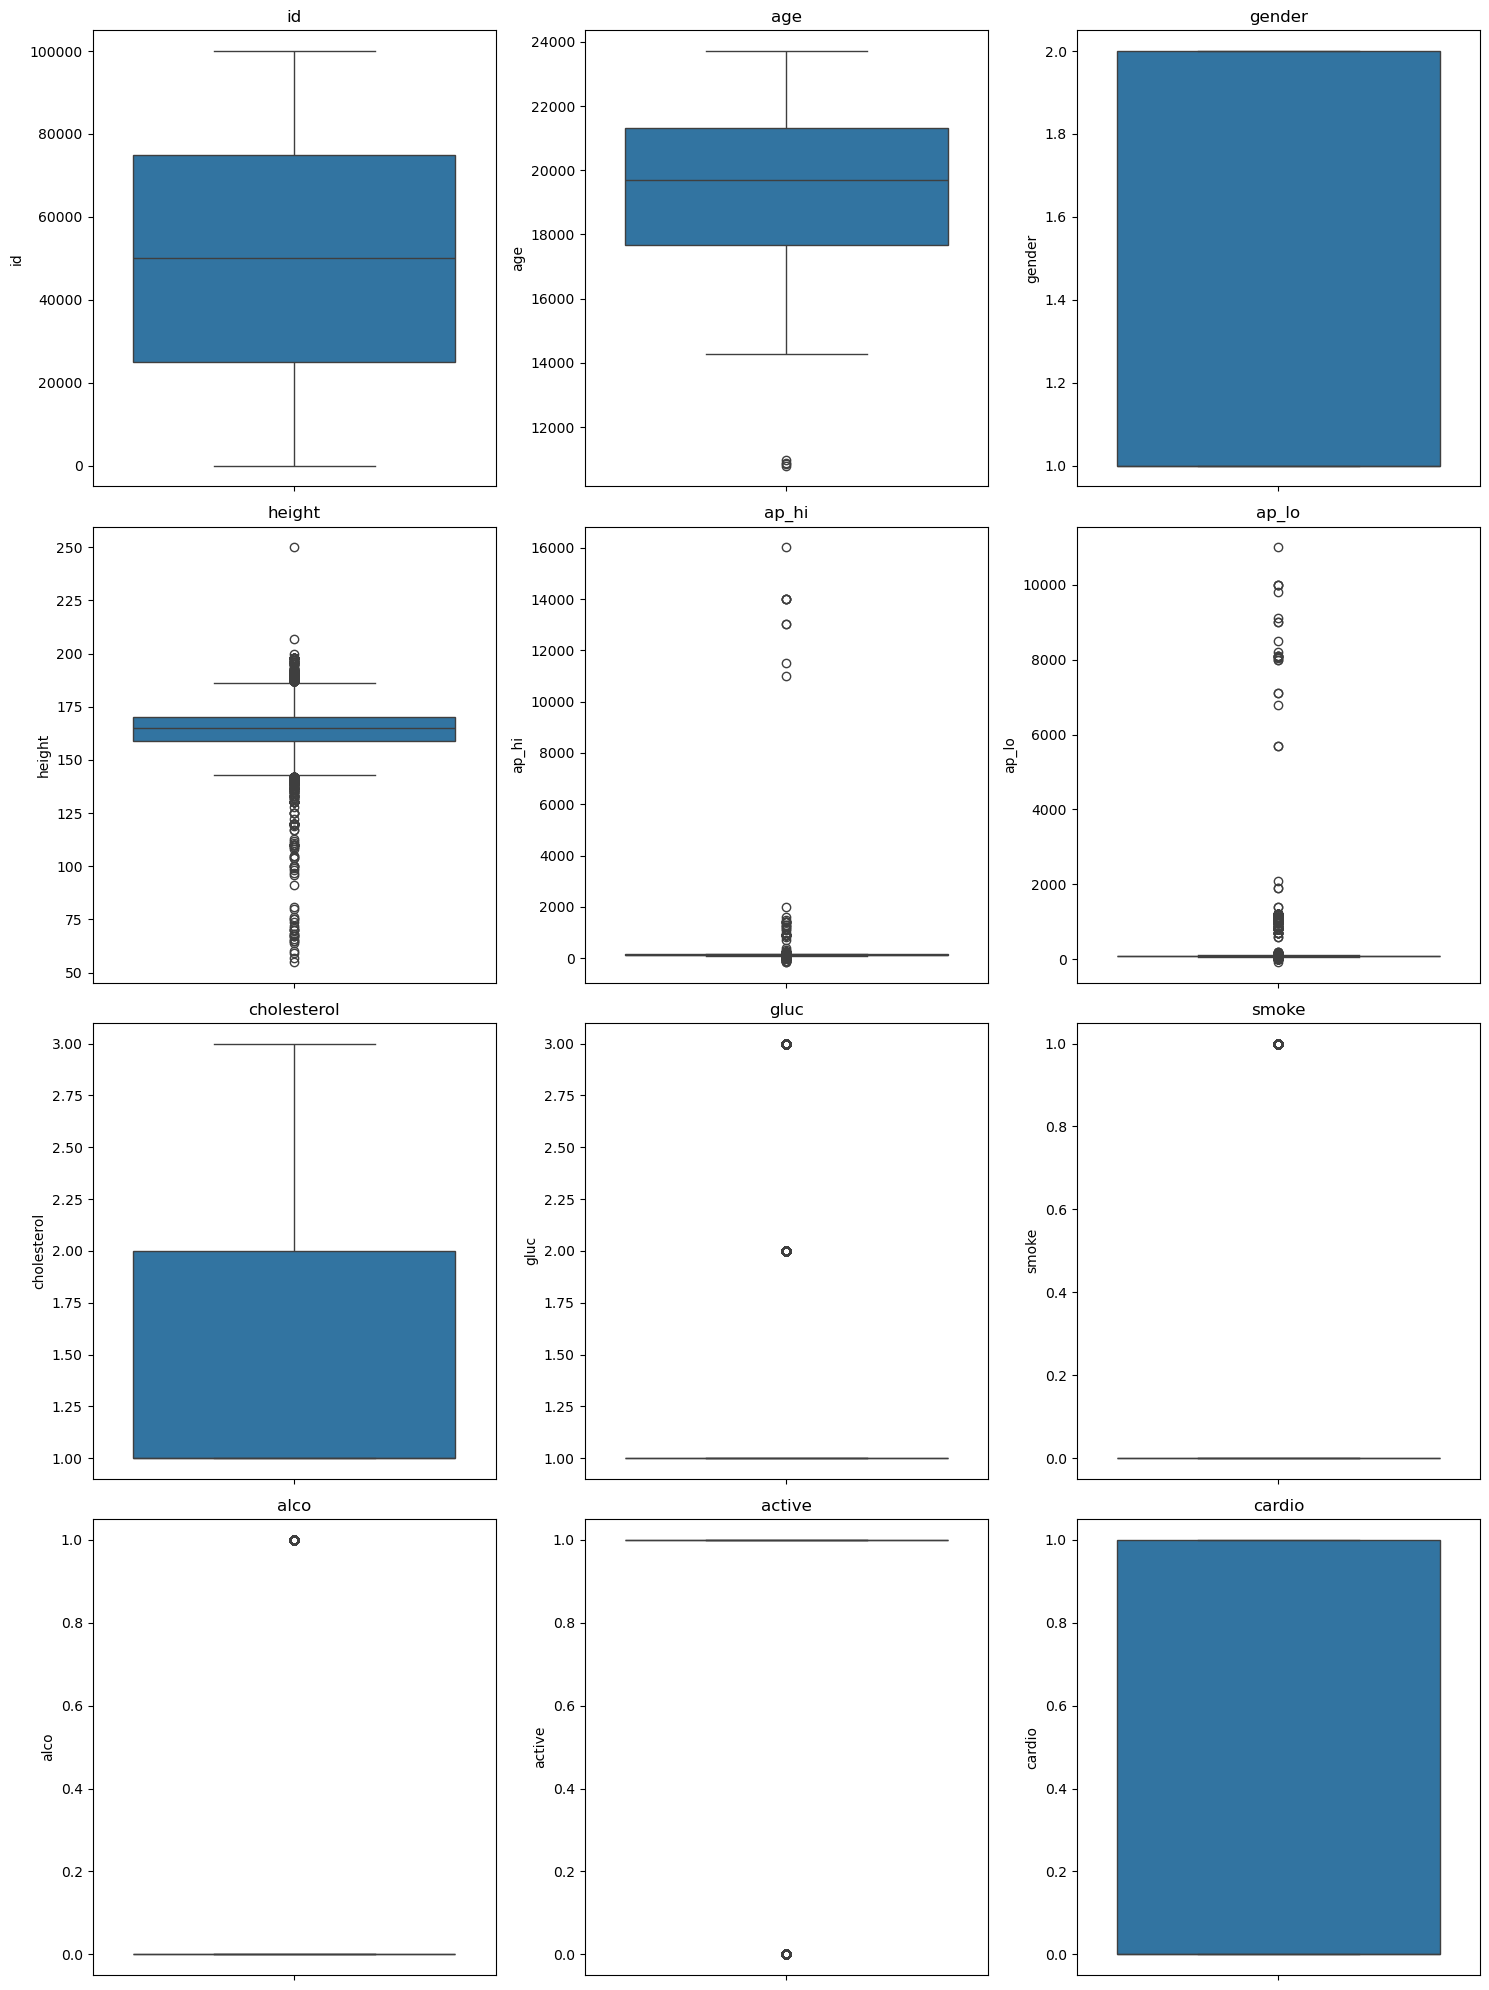

In [13]:
import seaborn as sns
numerical_features = ['id', 'age', 'gender', 'height', 'ap_hi', 'ap_lo','cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))

axes = axes.flatten()

# Plot each numerical feature
for i, feature in enumerate(numerical_features):
    sns.boxplot(y=df[feature], ax=axes[i])
    axes[i].set_title(feature)

# Hide unused subplots
for j in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



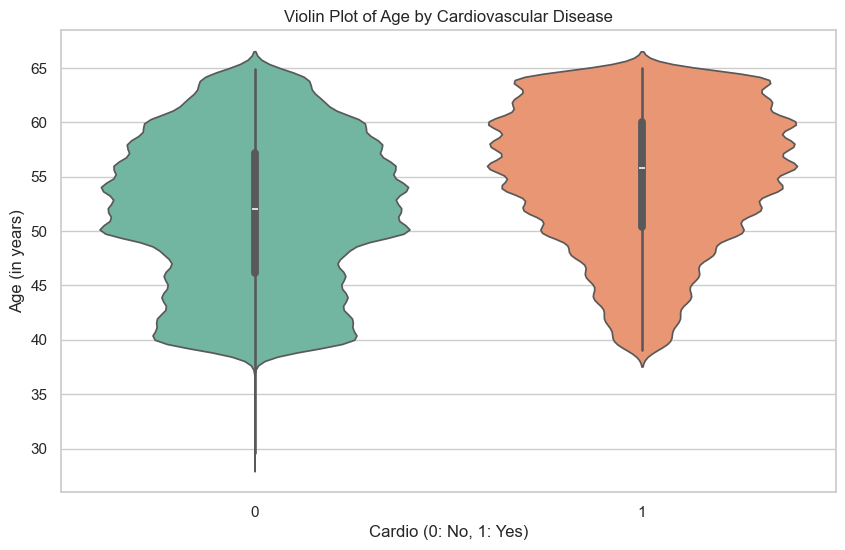

In [14]:

sns.set(style="whitegrid")

age_in_years = df["age"]/365

# Create Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="cardio", y=age_in_years, hue="cardio", legend=False, palette="Set2")  
plt.title("Violin Plot of Age by Cardiovascular Disease")
plt.xlabel("Cardio (0: No, 1: Yes)")
plt.ylabel("Age (in years)")
plt.show()


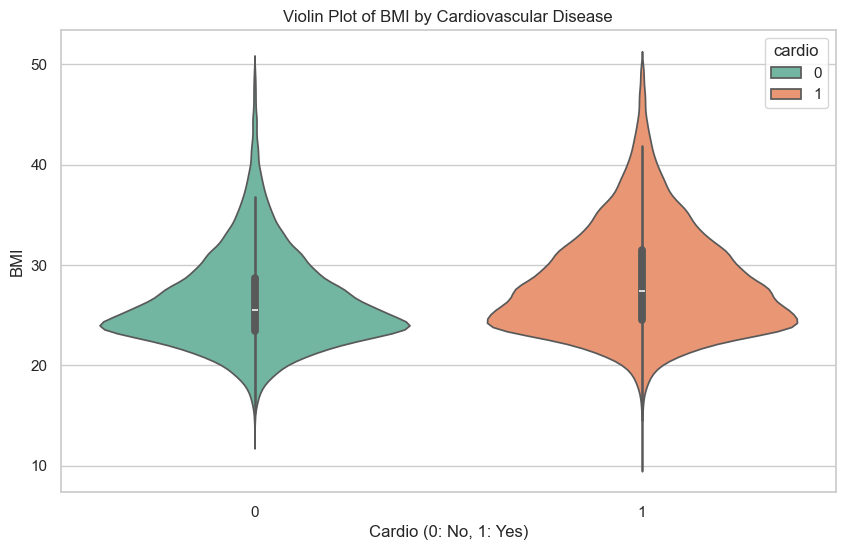

In [15]:
BMI = df["weight"] / (df["height"] / 100) ** 2  # Calculate BMI

sns.set(style="whitegrid")

BMI_filtered = BMI[(BMI > 10) & (BMI < 50)]  # Remove outliers

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="cardio", y=BMI_filtered, hue="cardio", palette="Set2")
plt.title("Violin Plot of BMI by Cardiovascular Disease")
plt.xlabel("Cardio (0: No, 1: Yes)")
plt.ylabel("BMI")
plt.show()


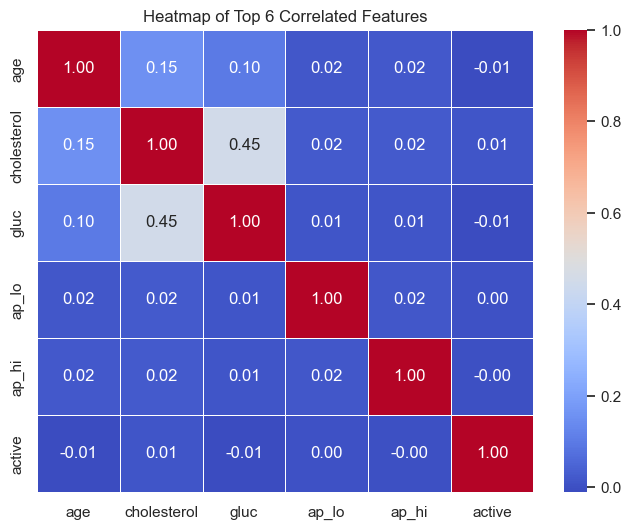

In [16]:
# Compute correlation matrix
corr_matrix = df[numerical_features].corr()

# Find top 6 features most correlated with "Diabetes_012" 
top_features = corr_matrix['cardio'].abs().sort_values(ascending=False)[1:7].index 

plt.figure(figsize=(8, 6))
sns.heatmap(df[top_features].corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Top 6 Correlated Features")
plt.show()


In [17]:
X = df.drop(columns=['id','cardio'])
y = df['cardio']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
df['cardio'].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

<Axes: xlabel='cardio', ylabel='count'>

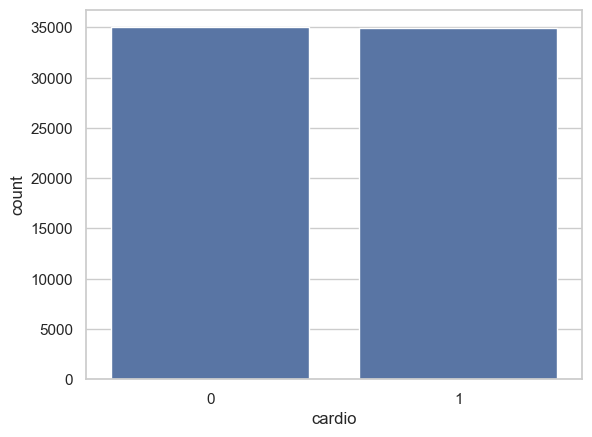

In [19]:
sns.countplot(x=df['cardio'])

In [20]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

Metrics for Logistic Regression:
              precision    recall  f1-score   support

           0       0.64      0.68      0.66      6988
           1       0.66      0.63      0.64      7012

    accuracy                           0.65     14000
   macro avg       0.65      0.65      0.65     14000
weighted avg       0.65      0.65      0.65     14000





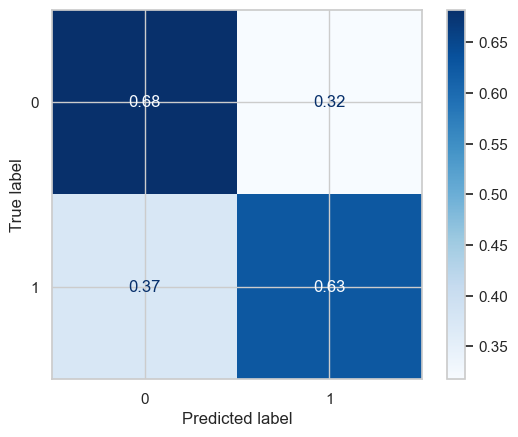

Metrics for Random Forest:
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      6988
           1       0.72      0.70      0.71      7012

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000





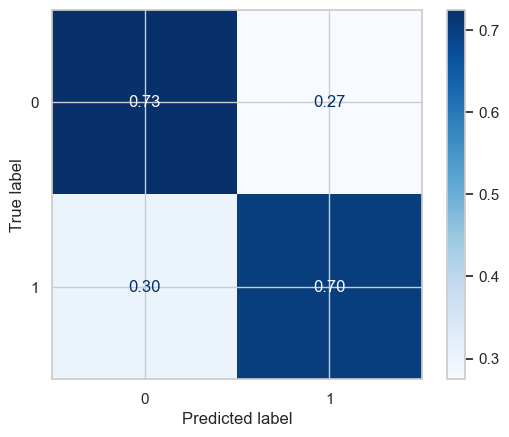

Metrics for Decision Tree:
              precision    recall  f1-score   support

           0       0.63      0.62      0.63      6988
           1       0.63      0.64      0.63      7012

    accuracy                           0.63     14000
   macro avg       0.63      0.63      0.63     14000
weighted avg       0.63      0.63      0.63     14000





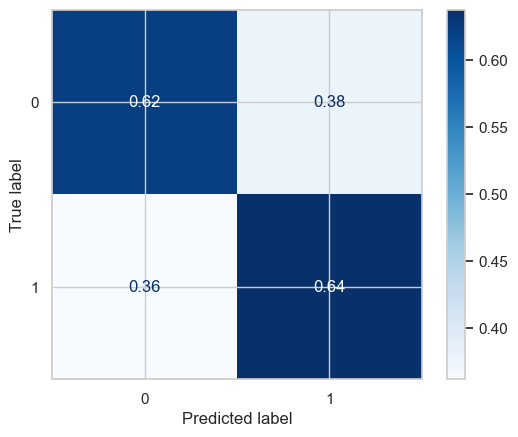

C:\Users\kulla\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:04:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Metrics for XGBoost:
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      6988
           1       0.75      0.70      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000





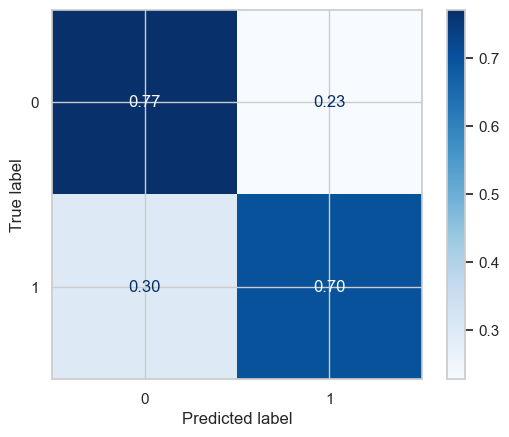

C:\Users\kulla\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Metrics for MLP Classifier:
              precision    recall  f1-score   support

           0       0.70      0.80      0.75      6988
           1       0.77      0.65      0.70      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.72     14000
weighted avg       0.73      0.73      0.72     14000





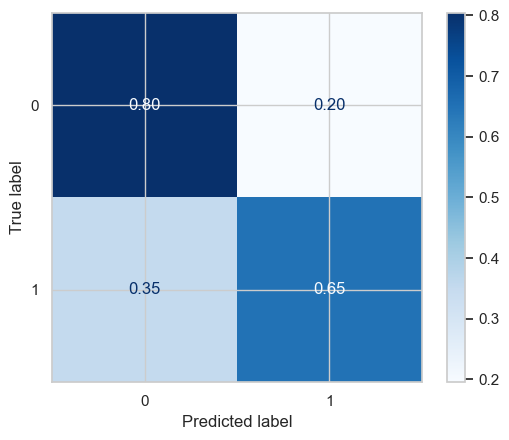

In [21]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns


# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
     "Decision Tree": DecisionTreeClassifier(),
     "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
     "MLP Classifier": MLPClassifier(hidden_layer_sizes=(50, 50),max_iter=100)
}

results = {}

# Train models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] 
    print(f"Metrics for {name}:")
    print(classification_report(y_test, y_pred))
    print("\n")
    cm=confusion_matrix(y_test, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1, keepdims=True)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized)
    disp.plot(cmap="Blues", values_format=".2f")
    plt.show()
    
    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    results[name] = [accuracy, precision, recall, f1, roc_auc]


In [22]:
# Convert results to DataFrame
results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]).T
print(results_df)

                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.653786   0.663891  0.625357  0.644048  0.708833
Random Forest        0.713714   0.719462  0.702225  0.710739  0.773928
Decision Tree        0.629786   0.628495  0.637906  0.633166  0.629835
XGBoost              0.735714   0.754691  0.699800  0.726210  0.797721
MLP Classifier       0.726429   0.769114  0.648460  0.703652  0.788909


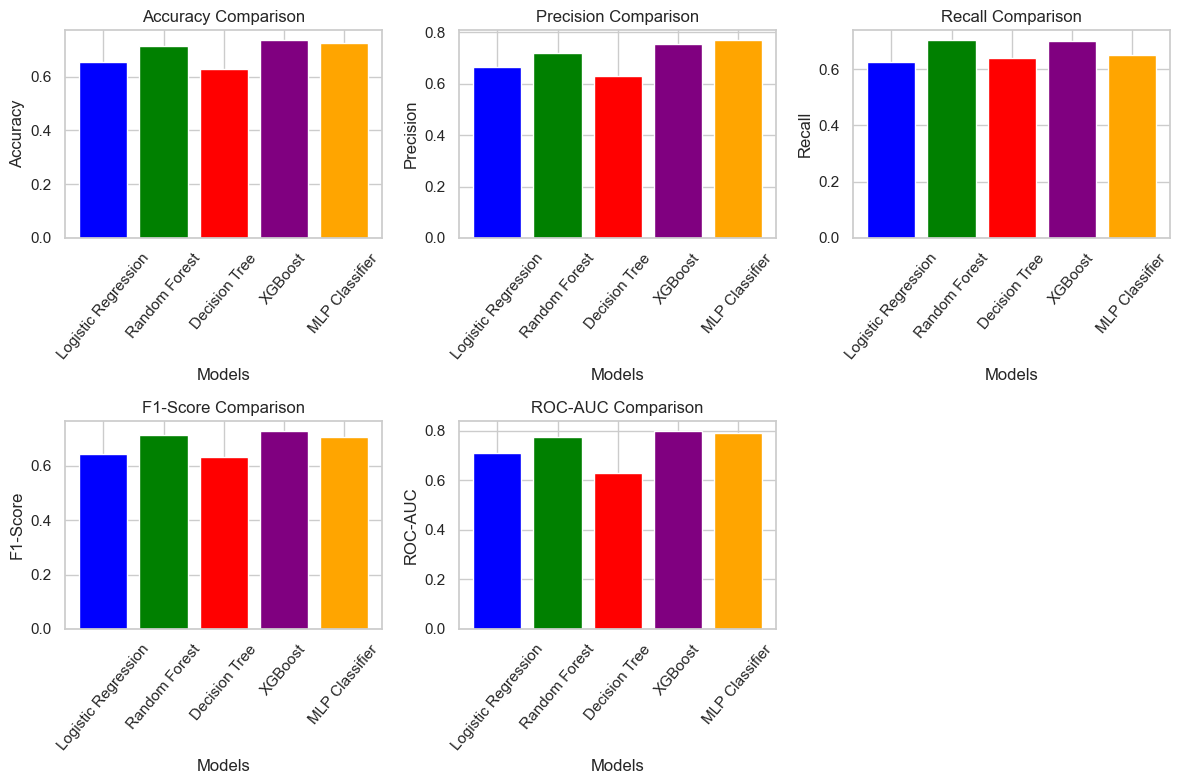

In [23]:
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]

plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    plt.bar(results_df.index, results_df[metric], color=['blue', 'green', 'red', 'purple', 'orange'])
    plt.xlabel("Models")
    plt.ylabel(metric)
    plt.title(f"{metric} Comparison")
    plt.xticks(rotation=50)

plt.tight_layout()
plt.show()

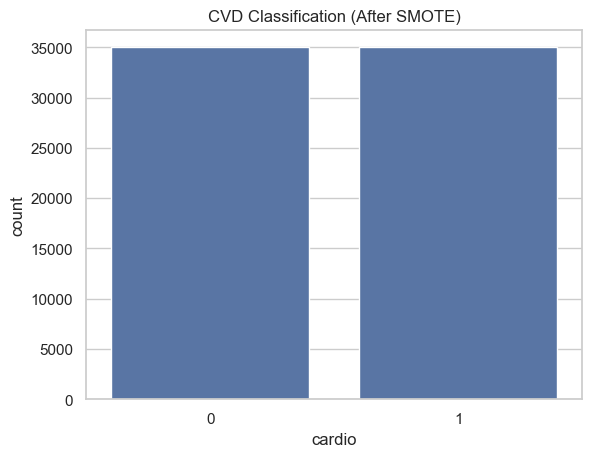

In [25]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
df_resampled = pd.DataFrame(y_resampled, columns=['cardio'])

sns.countplot(x=df_resampled['cardio'])
plt.title("CVD Classification (After SMOTE)")
plt.show()

In [26]:
df_resampled['cardio'].value_counts()

cardio
0    35021
1    35021
Name: count, dtype: int64

Metrics for Logistic Regression:
              precision    recall  f1-score   support

           0       0.64      0.68      0.66      6924
           1       0.67      0.62      0.64      7085

    accuracy                           0.65     14009
   macro avg       0.65      0.65      0.65     14009
weighted avg       0.65      0.65      0.65     14009





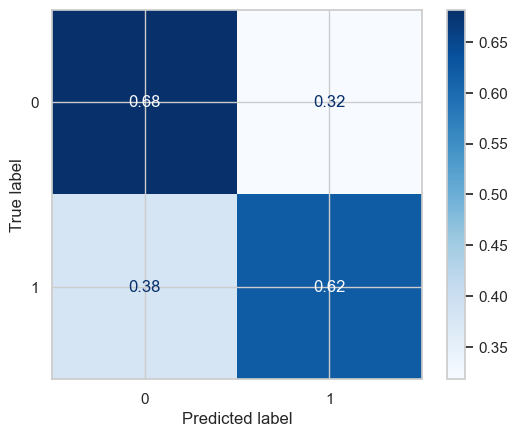

Metrics for Random Forest:
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      6924
           1       0.73      0.71      0.72      7085

    accuracy                           0.72     14009
   macro avg       0.72      0.72      0.72     14009
weighted avg       0.72      0.72      0.72     14009





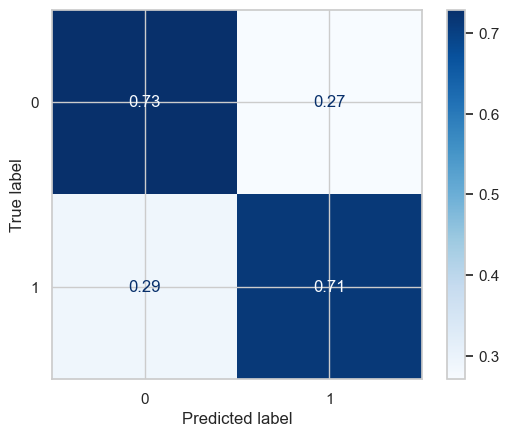

Metrics for Decision Tree:
              precision    recall  f1-score   support

           0       0.63      0.63      0.63      6924
           1       0.64      0.64      0.64      7085

    accuracy                           0.63     14009
   macro avg       0.63      0.63      0.63     14009
weighted avg       0.63      0.63      0.63     14009





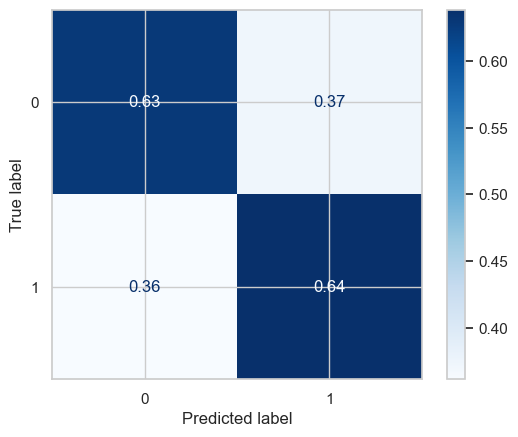

C:\Users\kulla\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:06:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Metrics for XGBoost:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6924
           1       0.77      0.70      0.73      7085

    accuracy                           0.74     14009
   macro avg       0.74      0.74      0.74     14009
weighted avg       0.74      0.74      0.74     14009





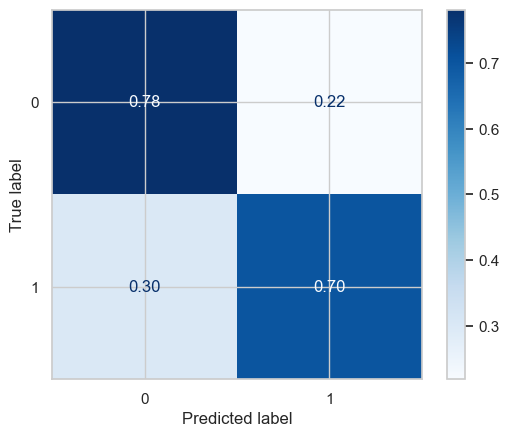

Metrics for MLP Classifier:
              precision    recall  f1-score   support

           0       0.70      0.77      0.73      6924
           1       0.75      0.68      0.71      7085

    accuracy                           0.72     14009
   macro avg       0.73      0.72      0.72     14009
weighted avg       0.73      0.72      0.72     14009





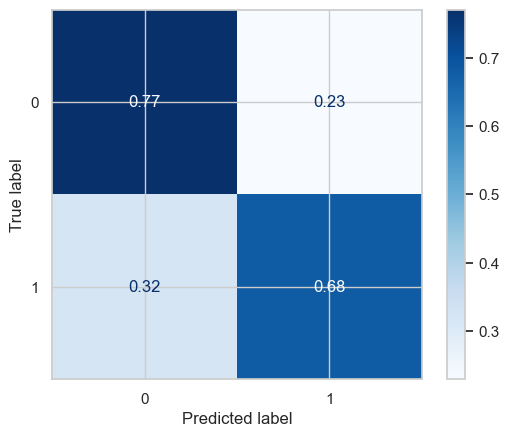

In [27]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns


# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
     "Decision Tree": DecisionTreeClassifier(),
     "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
     "MLP Classifier": MLPClassifier(hidden_layer_sizes=(50, 50),max_iter=100)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] 
    print(f"Metrics for {name}:")
    print(classification_report(y_test, y_pred))
    print("\n")
    cm=confusion_matrix(y_test, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1, keepdims=True)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized)
    disp.plot(cmap="Blues", values_format=".2f")
    plt.show()
    
    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    results[name] = [accuracy, precision, recall, f1, roc_auc]

In [28]:
results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]).T
print(results_df)

                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.650225   0.665756  0.619337  0.641708  0.705201
Random Forest        0.720680   0.729058  0.712491  0.720680  0.778813
Decision Tree        0.633236   0.637093  0.638532  0.637812  0.633122
XGBoost              0.740238   0.765977  0.700353  0.731697  0.801120
MLP Classifier       0.724463   0.751914  0.679323  0.713777  0.787020


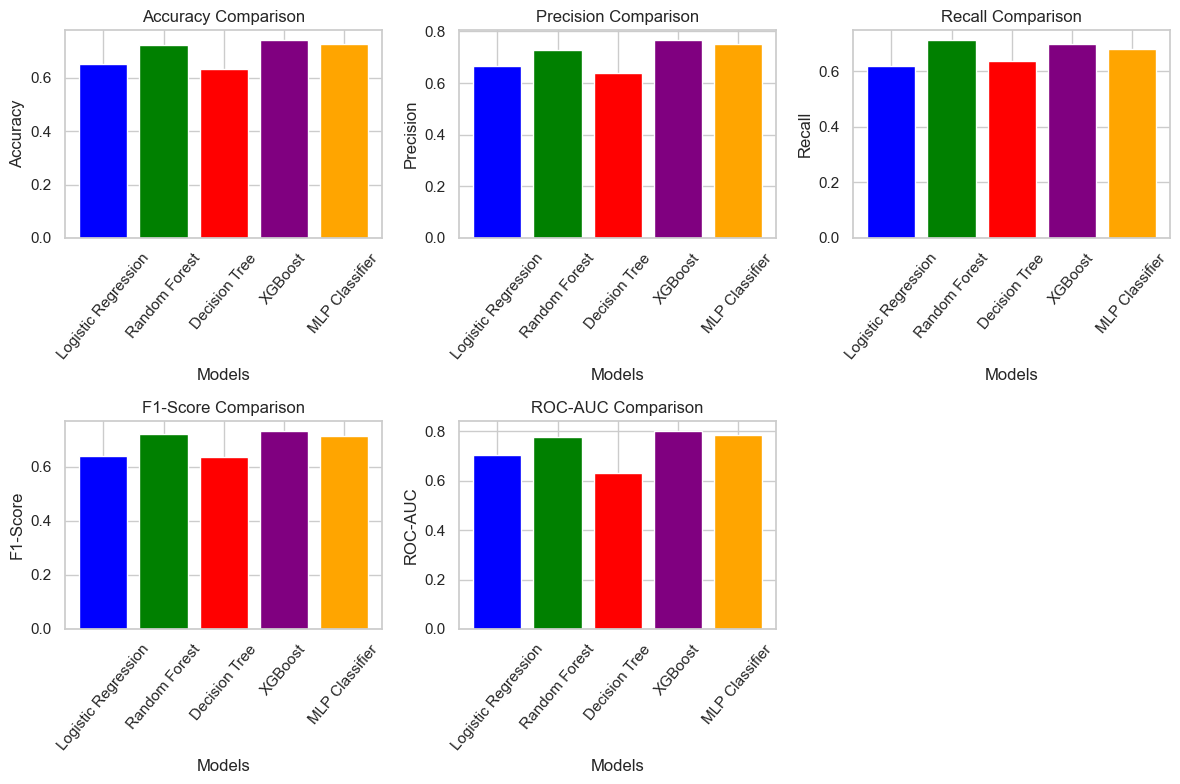

In [29]:
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]

plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    plt.bar(results_df.index, results_df[metric], color=['blue', 'green', 'red', 'purple', 'orange'])
    plt.xlabel("Models")
    plt.ylabel(metric)
    plt.title(f"{metric} Comparison")
    plt.xticks(rotation=50)

plt.tight_layout()
plt.show()
